# Análise de dados: Churn de clientes de banco

Projeto de machine learning para análise de dados e classificação de clientes que potencialmente poderão encerrar suas contas em um banco, os dados estão disponíveis na plataforma [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling).

O problema a ser solucionado consiste em utilizar os dados bancários dos clientes que efetuaram ou não o encerramento de suas contas para criar um modelo preditivo que irá identificar possíveis clientes que poderão ou não deixar a instituição bancária, podendo assim determinar a taxa de churn (rotatividade/perda de clientes) e com base nos perfis mapeados tomar ações para retenção dos mesmos, evitando impactos como, por exemplo, aumento de custos, queda de lucro, reputação da marca entre outros fatores sensíveis a experiência do cliente com o produto da empresa.

## Demanda da análise

- Analisar a correlação dos dados dos clientes.
- Gerar um modelo preditivo de churn por parte de um cliente.
- Simular novas entradas de dados e previsões.

## Tópicos da análise

1. Análise das medidas estatísticas dos dados
2. Distribuição dos valores da váriavel dependente (target)
3. Distribuição dos dados entre as variáveis independentes (features) e dependente (target)
4. Correlação entre as variáveis
5. Criação do modelo preditivo
   1. Separação dos dados de treino e teste
   2. Treinamento e predições do modelo
   3. Métricas do modelo
   4. Previsões com novos dados
6. Conclusão

## Dicionário de dados

**RowNumber:** Números de linha de 1 a 10.000<br>
**CustomerId:** Ids exclusivos para identificação do cliente do banco<br>
**Surname:** Sobrenome do cliente<br>
**CreditScore:** Score do cliente<br>
**Geography:** País onde o cliente reside<br>
**Gender:** Gênero, masculino ou feminino<br>
**Age:** Idade do cliente<br>
**Tenure:** Número de anos que o cliente está no banco<br>
**Balance:** Saldo bancário do cliente<br>
**NumOfProducts:** Número de produtos bancários que o cliente está utilizando<br>
**HasCrCard:** Flag para saber se o cliente possui um cartão de crédito do banco ou não<br>
**IsActiveMember:** Flag para saber se o cliente é um membro ativo do banco ou não<br>
**EstimatedSalary:** Salário estimado do cliente em dólares<br>
**Exited:** Flag, 1 se o cliente encerrou a conta no banco e 0 se o cliente permaneceu<br>


## Importação de bibliotecas


In [2]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## Carregamento dos dados


In [3]:
# Efetuando a limpeza de memória antes do carregamento dos dados
gc.collect()

# Caminho do arquivo de dados
path = 'dados/Churn_Modelling.csv'

# Criando um dataframe a partir do arquivo no diretório de dados
df = pd.read_csv(path, encoding='utf-8', sep=',')


## Detalhes do dataframe


In [4]:
# Informações do dataframe como nome das colunas, contagem de
# de dados, tipo de dados e quantidade de memória utilizada

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.6 MB


In [5]:
print(f'\nQuantidade de linhas (registros): {df.shape[0]}' )
print(f'\nQuantidade de colunas (variáveis): { df.shape[1]}')



Quantidade de linhas (registros): 10000

Quantidade de colunas (variáveis): 14


In [6]:
# Primeiras linhas do dataframe

df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Removendo colunas que não serão utilizadas


In [7]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


## Verificando e tratando se necessário registros duplicados


In [8]:
df.duplicated(keep='first').value_counts().to_frame()


,count
False,10000


## Verificando e tratando se necessário valores únicos


In [9]:
df.nunique().to_frame().rename(columns={0: 'Quantidade'})


,Quantidade
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


In [10]:
# Verificando a quantidade de valores únicos de coluna(s) específica(s)

def exibe_valores_unicos(coluna):
    '''
    Verifica a quantidade de valores únicos de coluna(s) específica(s)

    :param coluna: Column Dataframe
        Dataframe e coluna a ser analisado.
    '''
    coluna_qtde = pd.DataFrame(coluna.value_counts().sort_index())
    coluna_qtde = coluna_qtde.T
    print(f'\n{coluna_qtde}')

cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts']

for col in cols:
    exibe_valores_unicos(df[col])



Geography  France  Germany  Spain
count        5014     2509   2477

Gender  Female  Male
count     4543  5457

Tenure   0     1     2     3    4     5    6     7     8    9    10
count   413  1035  1048  1009  989  1012  967  1028  1025  984  490

NumOfProducts     1     2    3   4
count          5084  4590  266  60


## Verificando e tratando se necessário os tipos de valores


In [11]:
df.dtypes.to_frame().rename(columns={0: 'Tipo'})


,Tipo
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


## Verificando e tratando se necessário valores nulos


In [12]:
df.isnull().sum().to_frame().rename(columns={0: 'Quantidade'})


,Quantidade
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## Amostra de dados do dataframe


In [13]:
df.sample(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5168,544,Spain,Male,30,8,145241.63,1,1,1,80676.83,0
1999,633,Germany,Male,43,3,144164.29,1,1,1,158646.46,0
1610,588,France,Female,24,0,0.00,2,1,1,140586.08,0
1329,743,France,Female,40,6,0.00,1,1,0,28280.80,1
6675,654,Spain,Female,36,5,0.00,2,0,0,157238.05,0
7454,732,France,Male,46,0,0.00,2,1,1,184350.78,0
6800,711,France,Female,35,8,0.00,1,1,1,67508.01,0
7385,660,France,Male,38,4,0.00,2,0,0,88080.43,0
4923,651,Germany,Male,34,2,90355.12,2,0,0,193597.94,0
8777,603,Spain,Male,24,1,165149.13,2,1,0,21858.28,0


## 1. Análise das medidas estatísticas dos dados


In [14]:
# Descrição dos dados estatísticos

cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[cols].describe().T


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


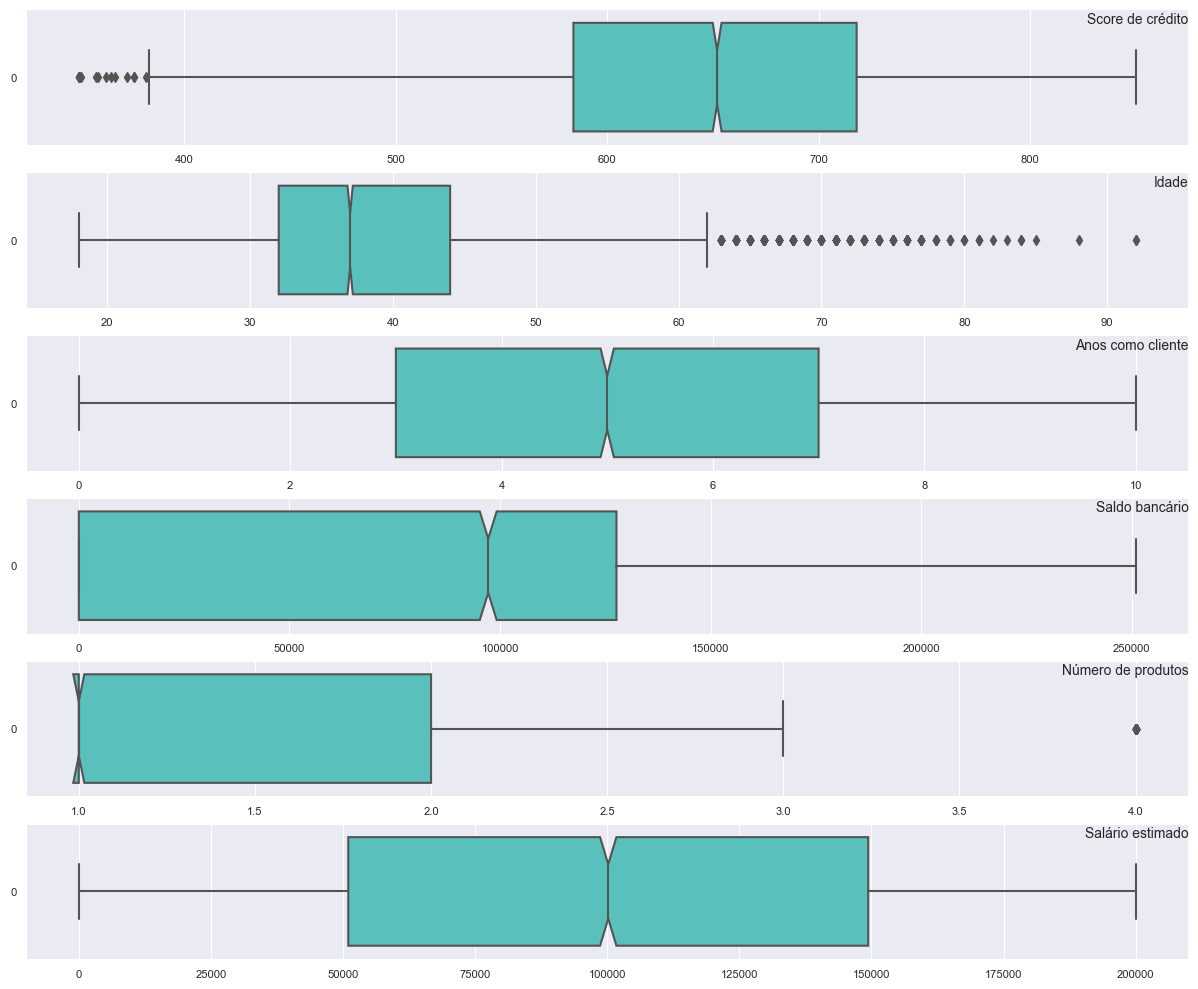

In [16]:
# Função para geração de gráficos boxplot

def graf_boxplot(coluna, ax, title):
    '''
    Verifica a quantidade de valores únicos de coluna(s) específica(s)

    :param coluna: Column Dataframe
        Dataframe e coluna a ser analisado.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    :param title: str
        Título dado ao gráfico.
    '''
    sns.boxplot(data=coluna, ax=ax, notch=True,
                orient='h', color='mediumturquoise')
    ax.set(xlabel='', ylabel='')
    ax.tick_params(labelsize=8)
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_title(title, loc='right', fontsize=10, pad=-10)


fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(
    nrows=6, ncols=1, figsize=(15, 10))

graf_boxplot(df['CreditScore'], ax1, 'Score de crédito')
graf_boxplot(df['Age'], ax2, 'Idade')
graf_boxplot(df['Tenure'], ax3, 'Anos como cliente')
graf_boxplot(df['Balance'], ax4, 'Saldo bancário')
graf_boxplot(df['NumOfProducts'], ax5, 'Número de produtos')
graf_boxplot(df['EstimatedSalary'], ax6, 'Salário estimado')

plt.subplots_adjust(top=1.9, bottom=0.95)
plt.show()


In [17]:
# Geração dos limites inferior e superior das variáveis que apresentaram outliers

cols = ['CreditScore', 'Age', 'NumOfProducts']

for col in cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ
    print(f'\n{col.upper()}')
    print(f'Limite inferior: {limite_inferior}')
    print(f'Limite superior: {limite_superior}')



CREDITSCORE
Limite inferior: 383.0
Limite superior: 919.0

AGE
Limite inferior: 14.0
Limite superior: 62.0

NUMOFPRODUCTS
Limite inferior: -0.5
Limite superior: 3.5


In [18]:
# Função para exibição dos valores únicos dos outliers

def valores_outliers (col, lim, sinal):
    '''
    Exibe os valores únicos dos outliers

    :param col: Column Dataframe
        Dataframe e coluna a ser analisado.
    :param lim: int
        Valor do limite inferior ou superior.
    :param sinal: str
        Símbolo de maior(>) ou menor(<).
    '''
    arr = np.array(df[col])
    if sinal == '>':
        val = arr[np.where(arr > lim)[0]]
    else:
        val = arr[np.where(arr < lim)[0]]
    print(f'\n{col.upper()}: {np.unique(val)}')
    
valores_outliers('CreditScore', 383, '<')
valores_outliers('Age', 62, '>')
valores_outliers('NumOfProducts', 3.5, '>')


CREDITSCORE: [350 351 358 359 363 365 367 373 376 382]

AGE: [63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88
 92]

NUMOFPRODUCTS: [4]


Algumas variáveis independentes apresentaram alguns outliers como **CreditScore** (Score de crédito) onde há pontuações abaixo de 380, aproximadamente, **Age** (Idade) com casos entre 60 e pouco mais de 90 anos e **NumOfProducts** (Número de produtos) onde há um grupo de clientes com 4 produtos bancários.
Estas situações não significam, necessariamente, que haja alguma inconsistência nos dados, mas sim que há casos que estão fora das orcorrências comuns identificadas no conjunto de dados, portanto seram mantidos.


## 2. Distribuição dos valores da váriavel dependente (target)


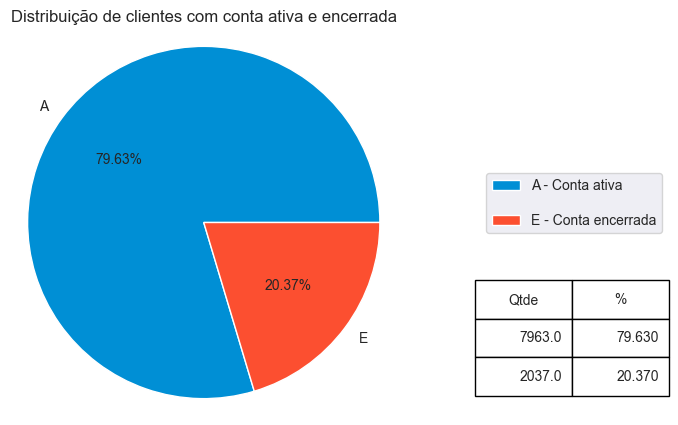

In [26]:
df_exited = df['Exited'].value_counts()
df_exited = pd.DataFrame(df_exited)
df_exited['%'] = df_exited['count'] / df_exited['count'].sum() * 100

plt.figure(figsize=(5, 5))

plt.pie(df_exited['%'], labels=['A', 'E'], colors=[
        '#008fd5', '#fc4f30'], autopct='%0.2f%%')
plt.legend(loc='right', labels=['A - Conta ativa', 'E - Conta encerrada'],
           labelspacing=1.5, bbox_to_anchor=(1.1, 0.1, 0.6, 0.9))
plt.title('Distribuição de clientes com conta ativa e encerrada')

cell_text = []
for row in range(len(df_exited)):
    cell_text.append(df_exited.iloc[row])
table = plt.table(cellText=cell_text, colLabels=['Qtde', '%'],
                  loc='bottom right', bbox=(1.2, 0.05, 0.5, 0.3))
table.auto_set_font_size(False)
table.set_fontsize(10)
for cell in table._cells:
    if cell == (2, 1) or cell == (1, 1):
        cell_text = table._cells[cell].get_text().get_text()
        table._cells[cell].get_text().set_text(f'{float(cell_text):.3f}')
plt.axis('equal')
plt.show()


Embora seja comum clientes fecharem contas bancárias, o atual percentual de **20,37%** de perda de clientes (_2037 contas_) é um índice muito alto, observando o gráfico está se aproximando de 1/4 do total de contas que o banco já administrou.


## 3. Distribuição dos dados entre as variáveis independentes (features) e dependente (target)


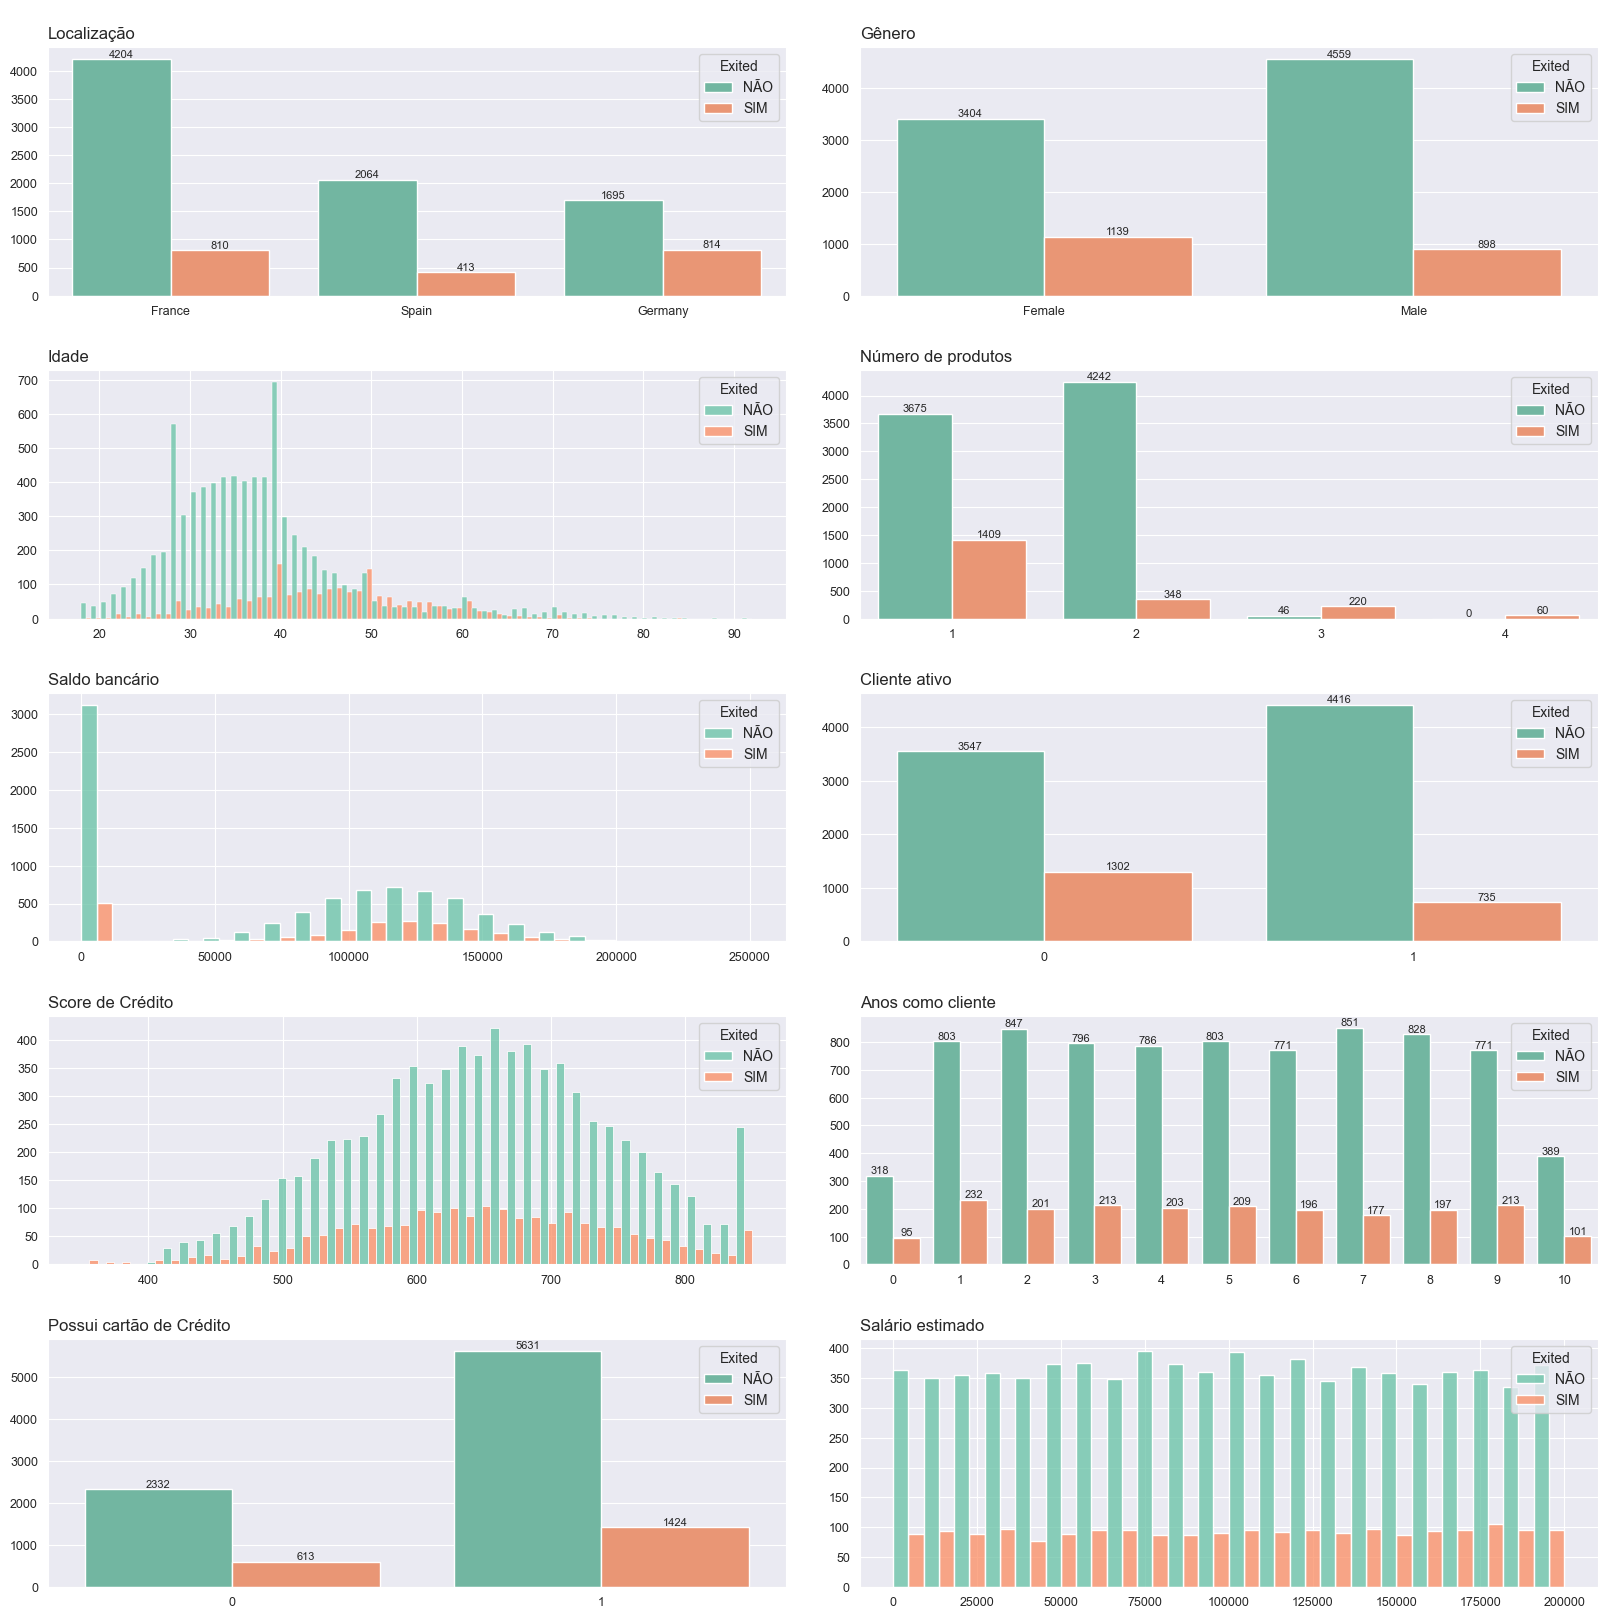

In [38]:
# Funções para gerar gráficos histplot e countplot

saida = df['Exited'].replace({0: 'NÃO', 1: 'SIM'})
hue_order = ['NÃO', 'SIM']


def graf_countplot(df, x, title, ax):
    '''
    Função para gerar gráficos countplot

    :param df: Dataframe
        Nome do dataframe.
    :param x: str
        Nome da coluna do dataframe.
    :param title: str
        Título dado ao gráfico.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    '''
    ax = sns.countplot(data=df, x=x, hue=saida, ax=ax,
                       hue_order=hue_order, palette='Set2')
    for container in ax.containers:
        ax.bar_label(container, size=8)
    ax.set(xlabel='', ylabel='')
    ax.set_title(title, loc='left')
    ax.tick_params(labelsize=9)


def graf_histplot(df, x, title, ax):
    '''
    Função para gerar gráficos histplot

    :param df: Dataframe
        Nome do dataframe.
    :param x: str
        Nome da coluna do dataframe.
    :param title: str
        Título dado ao gráfico.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    '''
    ax = sns.histplot(data=df, x=x, hue=saida, ax=ax,
                      hue_order=hue_order,  palette='Set2', multiple='dodge')
    ax.set(xlabel='', ylabel='')
    ax.set_title(title, loc='left')
    ax.tick_params(labelsize=9)


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),
      (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(20, 20))


graf_countplot(df, 'Geography', '\nLocalização', ax1)
graf_countplot(df, 'Gender', '\nGênero', ax2)
graf_histplot(df, 'Age', '\nIdade', ax3)
graf_countplot(df, 'NumOfProducts', '\nNúmero de produtos', ax4)
graf_histplot(df, 'Balance', '\nSaldo bancário', ax5)
graf_countplot(df, 'IsActiveMember', '\nCliente ativo', ax6)
graf_histplot(df, 'CreditScore', '\nScore de Crédito', ax7)
graf_countplot(df, 'Tenure', '\nAnos como cliente', ax8)
graf_countplot(df, 'HasCrCard', '\nPossui cartão de Crédito', ax9)
graf_histplot(df, 'EstimatedSalary', '\nSalário estimado', ax10)

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()


- A localização dos clientes que mais encerraram suas contas está mais concentrada na França (France) e Alemanha (Germany), sendo que visualmente há quase um empate na quantidade, destaque que se comparado aos clientes que mantiveram a conta a Alemanha é o país onde mais estão ocorrendo perdas de clientes.<br>
- Os clientes do gênero feminino são os que mais fecharam suas contas, fica mais evidente quando comparado aos clientes que se mantiveram.<br>
- Por idade, clientes com 40 e 50 anos aproximadamente são os que mais encerraram suas contas diferente dos que a mantiveram com idades de 28 e 40 anos aproximadamente.<br>
- Geralmente clientes que possuem um único produto contratado são os que mais fecharam suas contas sendo que a maioria que manteve conta no banco possuem dois ou somente um produto contratado.<br>
- Clientes sem saldo bancário possuem uma grande representação no volume de clientes, sendo estes os que mais encerraram suas contas.<br>
- Clientes que não movimentaram suas contas, não ativos, são os que mais fecharam suas contas bancárias.<br>
- Nos gráficos de Score de Crédito, Anos como cliente, Possui cartão de Crédito e Salário estimado, a quantidade de clientes que encerraram a conta, visualmente, segue em proporções semelhantes aos que mantiveram a conta.


## 4. Correlação entre as variáveis


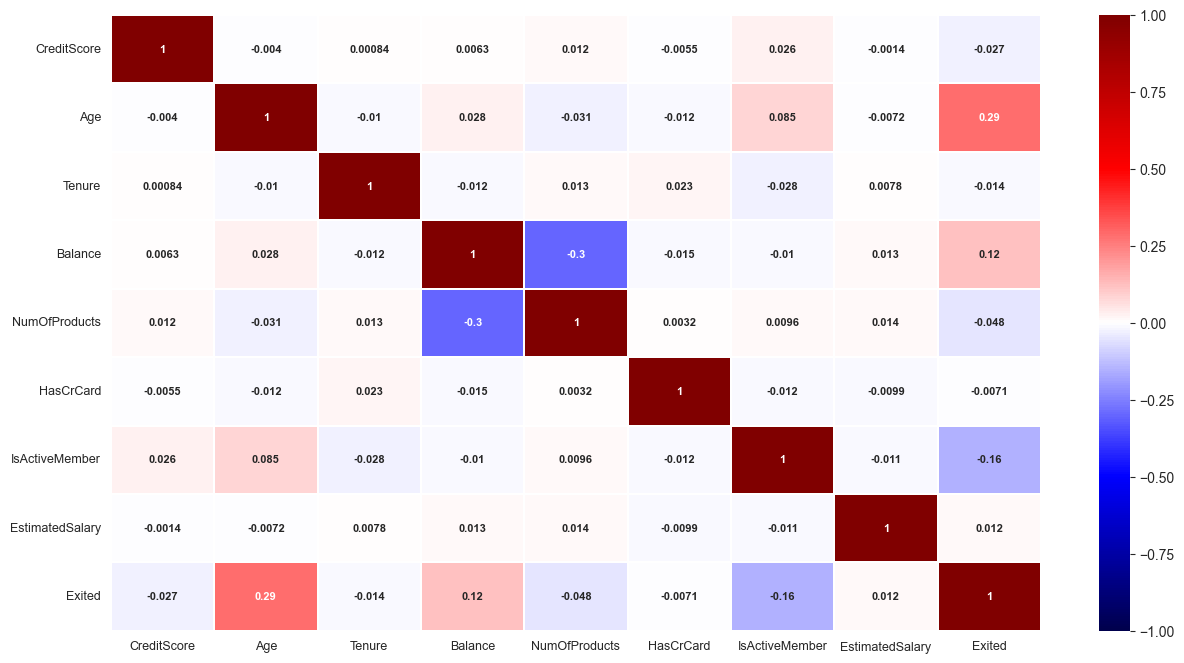

In [27]:
corr = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
           'IsActiveMember', 'EstimatedSalary', 'Exited']].corr()

plt.figure(figsize=(15, 8))
plot = sns.heatmap(data=corr, cmap='seismic', vmin=-1, linewidths=.2,
                   annot=True, annot_kws={'size': 8, 'fontweight': 'bold'})
plot.tick_params(labelsize=9)


## 5. Criação do modelo preditivo